In [1]:
# print(K.tensorflow_backend._get_available_gpus())
from __future__ import absolute_import, division, print_function, unicode_literals
#
import tensorflow as tf
#import keras.backend.tensorflow_backend as KTF
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device,True)

In [17]:
tf.device('/device:XLA_GPU:0')

In [18]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())


['/device:CPU:0', '/device:XLA_CPU:0', '/device:XLA_GPU:0', '/device:XLA_GPU:1']


In [182]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow.keras.layers as layers
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Attention,MaxPool1D,Dense, Conv1D, Convolution2D, GRU, LSTM, Bidirectional, TimeDistributed,
                          Dropout, Flatten, LayerNormalization,RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import load_model
from sklearn import preprocessing
from tensorflow.keras.models import load_model
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn import linear_model
import pandas as pd
import torch
import torch.nn as nn
import random
#from keras import layers as layers
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from scipy import special
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
#from keras_self_attention import SeqSelfAttention

from sklearn.preprocessing import StandardScaler

In [198]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [199]:
scaler = StandardScaler()

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

x_train = scaler.fit_transform(x_train.astype('float32')) 
x_test = scaler.transform(x_test.astype('float32'))

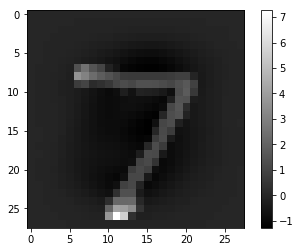

In [248]:
plt.imshow(x_test[0,:].reshape(28,28))
plt.colorbar()

In [12]:
def encode_identity_block(n_step=784,lr = 3e-4, drop_frac=0, l1_norm  = 0):
    
    X_input = layers.Input(shape=(n_step,1))
    X = X_input
    X = layers.Dense(24,activation='relu',name= 'encoder_dense')(X)
   # X = layers.add([X, X_shortcut])
    X = layers.BatchNormalization(axis=1)(X)
    X = layers.Activation('relu')(X) 
    model = Model(inputs=X_input, outputs=X, name='ResNet50')
    model.compile(Adam(lr), loss='mse')
    return model


In [13]:
encoderlayer = encode_identity_block()

In [14]:
encoderlayer.summary()

Model: "ResNet50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784, 1)]          0         
_________________________________________________________________
encoder_dense (Dense)        (None, 784, 24)           48        
_________________________________________________________________
batch_normalization_2 (Batch (None, 784, 24)           3136      
_________________________________________________________________
activation_2 (Activation)    (None, 784, 24)           0         
Total params: 3,184
Trainable params: 1,616
Non-trainable params: 1,568
_________________________________________________________________


In [42]:
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               8320

In [108]:
layer_name = 'dense_55'
intermediate_layer_model = Model(inputs=autoencoder.input,
                                 outputs=autoencoder.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_test_3d)

In [112]:
intermediate_output.shape

(10000, 16)

In [110]:
autoencoder.get_layer('dense_55').get_weights()[0].shape

(32, 16)

In [43]:
autoencoder.layers('dense_27')

TypeError: 'list' object is not callable

In [35]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)


embedding = Dense(16, activation='relu',activity_regularizer=l1(1e-4))(encoded)

decoded = Dense(64, activation='relu')(embedding)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='relu')(decoded)

In [36]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [37]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0536 - val_loss: 0.0371
Epoch 2/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0327 - val_loss: 0.0292
Epoch 3/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0277 - val_loss: 0.0260
Epoch 4/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0254 - val_loss: 0.0242
Epoch 5/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0241 - val_loss: 0.0234
Epoch 6/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0233 - val_loss: 0.0229
Epoch 7/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0227 - val_loss: 0.0222
Epoch 8/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0222 - val_loss: 0.0217
Epoch 9/50
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0218 - val_

In [38]:
decoded_imgs = autoencoder.predict(x_test)

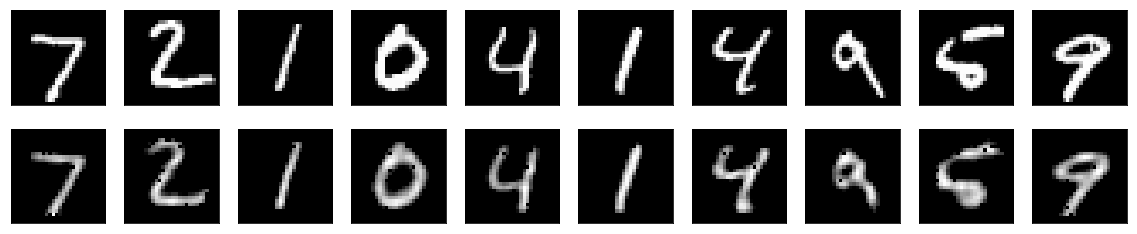

In [30]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

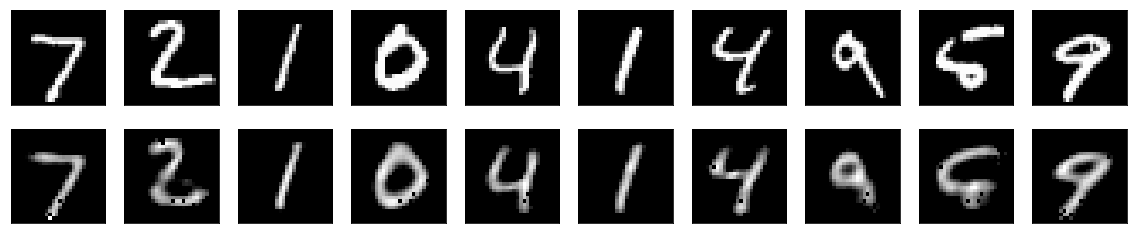

In [39]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
x = tf.transpose(x, (0, 2, 1)) 

In [90]:
input_img = Input(shape=(784,1))
encoded = Dense(256, activation='relu')(input_img)
encoded = tf.transpose(encoded, (0, 2, 1)) 
encoded = Conv1D(128, kernel_size = 2, strides=2, activation='relu',data_format='channels_last')(encoded)
#encoded = Conv1D(64, kernel_size = 2,strides=2, activation='relu',data_format='channels_first')(encoded)
encoded = Conv1D(32, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(encoded)

encoded = tf.transpose(encoded, (0, 2, 1))
encoded = Bidirectional(LSTM(16, return_sequences=False,
                             activity_regularizer=l1(1e-4)))(encoded)


embedding = Dense(16, activation='relu',activity_regularizer=l1(1e-4))(encoded)
repeat = RepeatVector(64)(embedding)


repeat = tf.transpose(repeat,(0,2,1))
attention = Attention()([repeat,repeat])

decoded = Conv1D(64, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(attention)
decoded = Conv1D(128, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(decoded)
decoded = Conv1D(784, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(decoded)
#decoded = Conv1D(784, kernel_size = 2,strides=2, activation='relu',data_format='channels_first')(decoded)
decoded = tf.transpose(decoded, (0, 2, 1))
# decoded = Bidirectional(LSTM(392, return_sequences=False,
#                              activity_regularizer=l1(1e-4)))(decoded)
decoded = Dense(1,activation='linear')(decoded)

In [91]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [81]:
input_img.shape

TensorShape([None, None, 784, 1])

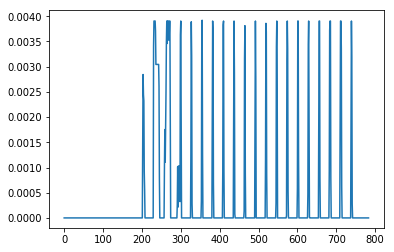

In [84]:
plt.plot(x_test[0,:])

In [135]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [136]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [137]:
x_train.shape

(60000, 28, 28, 1)

In [138]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 16s 271us/step - loss: 0.2156 - val_loss: 0.1649
Epoch 2/50
18304/60000 [========>.....................] - ETA: 10s - loss: 0.1633

KeyboardInterrupt: 

In [139]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 8)           0   

In [147]:
input_img = Input(shape=(784, 1))  # adapt this if using `channels_first` image data format
x = Conv1D(16, 3, activation='relu', padding='same')(input_img)

In [237]:
input_img = Input(shape=(784, 1))  # adapt this if using `channels_first` image data format
x = Conv1D(128, 3, activation='relu', padding='same')(input_img)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(128, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(128, 3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(2, padding='same')(x)

encoded = Bidirectional(LSTM(64, return_sequences=False,
                             activity_regularizer=l1(1e-4)))(encoded)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
embedding = Dense(32, activation='relu',activity_regularizer=l1(1e-4))(encoded)
repeat = RepeatVector(196)(embedding)

x = Conv1D(128, 3, activation='relu', padding='same')(repeat)
x = UpSampling1D(2)(x)
x = Conv1D(128, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
x = Conv1D(128, 3, activation='relu', padding='same')(x)
#x = UpSampling1D(2)(x)
decoded = Conv1D(1, 3, activation='linear', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(Adam(3e-5), loss='mse')

In [238]:
autoencoder.summary()

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        [(None, 784, 1)]          0         
_________________________________________________________________
conv1d_188 (Conv1D)          (None, 784, 128)          512       
_________________________________________________________________
max_pooling1d_45 (MaxPooling (None, 392, 128)          0         
_________________________________________________________________
conv1d_189 (Conv1D)          (None, 392, 128)          49280     
_________________________________________________________________
max_pooling1d_46 (MaxPooling (None, 196, 128)          0         
_________________________________________________________________
conv1d_190 (Conv1D)          (None, 196, 128)          49280     
_________________________________________________________________
max_pooling1d_47 (MaxPooling (None, 98, 128)           0  

In [ ]:
x_train = np.atleast_3d(x_train)
x_test = np.atleast_3d(x_test)


In [240]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=512,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 148s 2ms/sample - loss: 0.9090 - val_loss: 0.9030
Epoch 2/10
60000/60000 [==============================] - 147s 2ms/sample - loss: 0.8983 - val_loss: 0.8985
Epoch 3/10
60000/60000 [==============================] - 147s 2ms/sample - loss: 0.8964 - val_loss: 0.8980
Epoch 4/10
60000/60000 [==============================] - 146s 2ms/sample - loss: 0.8961 - val_loss: 0.8978
Epoch 5/10
60000/60000 [==============================] - 146s 2ms/sample - loss: 0.8960 - val_loss: 0.8977
Epoch 6/10
60000/60000 [==============================] - 146s 2ms/sample - loss: 0.8959 - val_loss: 0.8977
Epoch 7/10
60000/60000 [==============================] - 149s 2ms/sample - loss: 0.8958 - val_loss: 0.8975
Epoch 8/10
60000/60000 [==============================] - 149s 2ms/sample - loss: 0.8957 - val_loss: 0.8975
Epoch 9/10
60000/60000 [==============================] - 150s 2ms/sample - loss: 0.89

In [228]:
autoencoder.save('looks_not_work.h5')

In [241]:
input_img = Input(shape=(784, 1))  # adapt this if using `channels_first` image data format
x = Conv1D(16, 3, activation='relu', padding='same')(input_img)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(8, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(8, 3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(2, padding='same')(x)


# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv1D(8, 3, activation='relu', padding='same')(encoded)
x = UpSampling1D(2)(x)
x = Conv1D(8, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
x = Conv1D(16, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
decoded = Conv1D(1, 3, activation='linear', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [242]:
autoencoder.summary()

Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        [(None, 784, 1)]          0         
_________________________________________________________________
conv1d_195 (Conv1D)          (None, 784, 16)           64        
_________________________________________________________________
max_pooling1d_48 (MaxPooling (None, 392, 16)           0         
_________________________________________________________________
conv1d_196 (Conv1D)          (None, 392, 8)            392       
_________________________________________________________________
max_pooling1d_49 (MaxPooling (None, 196, 8)            0         
_________________________________________________________________
conv1d_197 (Conv1D)          (None, 196, 8)            200       
_________________________________________________________________
max_pooling1d_50 (MaxPooling (None, 98, 8)             0  

In [243]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=512,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 350us/sample - loss: 0.6799 - val_loss: 0.4281
Epoch 2/10
60000/60000 [==============================] - 17s 291us/sample - loss: 0.3399 - val_loss: 0.2689
Epoch 3/10
60000/60000 [==============================] - 17s 291us/sample - loss: 0.2355 - val_loss: 0.2042
Epoch 4/10
60000/60000 [==============================] - 17s 288us/sample - loss: 0.1889 - val_loss: 0.1723
Epoch 5/10
60000/60000 [==============================] - 16s 269us/sample - loss: 0.1661 - val_loss: 0.1611
Epoch 6/10
60000/60000 [==============================] - 17s 286us/sample - loss: 0.1520 - val_loss: 0.1453
Epoch 7/10
60000/60000 [==============================] - 17s 284us/sample - loss: 0.1415 - val_loss: 0.1349
Epoch 8/10
60000/60000 [==============================] - 17s 286us/sample - loss: 0.1330 - val_loss: 0.1277
Epoch 9/10
60000/60000 [==============================] - 17s 282us/sample - l

In [208]:
cd Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks/


/home/shuyu/497_MAT_Assignment/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks


In [209]:
autoencoder.save('conv1d.h5')

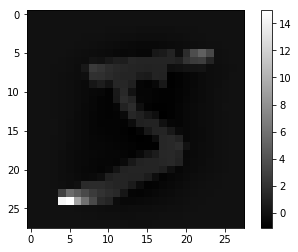

In [230]:
plt.imshow(x_train[0,:,0].reshape(28,28))
plt.colorbar()

In [244]:
decoded_image = autoencoder.predict(x_test)

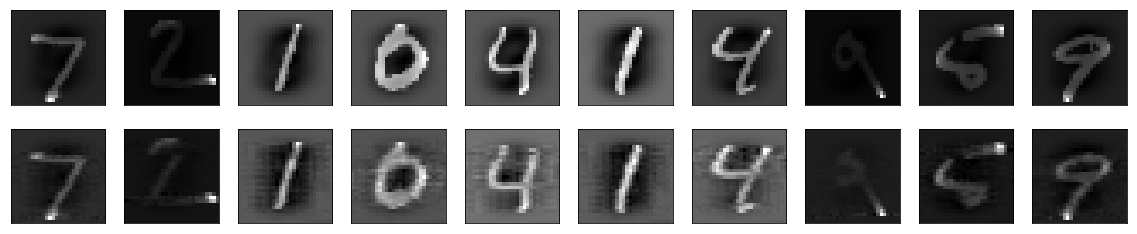

In [245]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt



n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_image[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [168]:
decoded_image

array([[[4.2098789e-03],
        [5.0659644e-05],
        [2.5362284e-05],
        ...,
        [2.6819066e-04],
        [3.3557721e-04],
        [4.4134855e-03]],

       [[4.2098789e-03],
        [5.0659644e-05],
        [2.5362284e-05],
        ...,
        [2.6819066e-04],
        [3.3557721e-04],
        [4.4134855e-03]],

       [[4.2098789e-03],
        [5.0659644e-05],
        [2.5362284e-05],
        ...,
        [2.6819066e-04],
        [3.3557721e-04],
        [4.4134855e-03]],

       ...,

       [[4.2098789e-03],
        [5.0659644e-05],
        [2.5362284e-05],
        ...,
        [2.6819066e-04],
        [3.3557721e-04],
        [4.4134855e-03]],

       [[4.2098789e-03],
        [5.0659644e-05],
        [2.5362284e-05],
        ...,
        [2.6819066e-04],
        [3.3557721e-04],
        [4.4134855e-03]],

       [[4.2098789e-03],
        [5.0659644e-05],
        [2.5362284e-05],
        ...,
        [2.6819066e-04],
        [3.3557721e-04],
        [4.4134855e-03]]

In [122]:
input_img = Input(shape=(784,1))
encoded = Conv1D(128, kernel_size = 2, strides=2, activation='relu',data_format='channels_last')(input_img)
encoded = Bidirectional(LSTM(16, return_sequences=False,
                             activity_regularizer=l1(1e-4)))(encoded)
repeat = RepeatVector(784)(encoded)
#repeat = tf.transpose(repeat,(0,2,1))
decoded = Conv1D(64, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(repeat)
decoded = Conv1D(1, kernel_size = 2,strides=2, activation='linear',data_format='channels_last')(decoded)

In [123]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [124]:
autoencoder.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 784, 1)]          0         
_________________________________________________________________
conv1d_76 (Conv1D)           (None, 392, 128)          384       
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 32)                18560     
_________________________________________________________________
repeat_vector_16 (RepeatVect (None, 784, 32)           0         
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 392, 64)           4160      
_________________________________________________________________
conv1d_78 (Conv1D)           (None, 196, 1)            129       
Total params: 23,233
Trainable params: 23,233
Non-trainable params: 0
______________________________________________________

In [109]:
input_img = Input(shape=(784,1))
#attention = Attention()([repeat,repeat])
#attention = Attention()([repeat,repeat])
#encoded = Dense(256, activation='relu')(input_img)
#encoded = tf.transpose(encoded, (0, 2, 1)) 
encoded = Conv1D(128, kernel_size = 2, strides=2, activation='relu',data_format='channels_last')(input_img)
#encoded = Conv1D(64, kernel_size = 2,strides=2, activation='relu',data_format='channels_first')(encoded)
encoded = Conv1D(32, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(encoded)

encoded = tf.transpose(encoded, (0, 2, 1))
encoded = Bidirectional(LSTM(16, return_sequences=False,
                             activity_regularizer=l1(1e-4)))(encoded)


embedding = Dense(16, activation='relu',activity_regularizer=l1(1e-4))(encoded)
repeat = RepeatVector(784)(embedding)


repeat = tf.transpose(repeat,(0,2,1))

decoded = Conv1D(64, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(repeat)
decoded = Conv1D(128, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(decoded)
decoded = Conv1D(784, kernel_size = 2,strides=2, activation='relu',data_format='channels_last')(decoded)
#decoded = Conv1D(784, kernel_size = 2,strides=2, activation='relu',data_format='channels_first')(decoded)
decoded = tf.transpose(decoded, (0, 2, 1))
# decoded = Bidirectional(LSTM(392, return_sequences=False,
#                              activity_regularizer=l1(1e-4)))(decoded)
decoded = Dense(1,activation='linear')(decoded)

In [114]:
autoencoder.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 784, 1)]          0         
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 392, 128)          384       
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 196, 32)           8224      
_________________________________________________________________
tf_op_layer_transpose_48 (Te [(None, 32, 196)]         0         
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 32)                27264     
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
repeat_vector_13 (RepeatVect (None, 64, 16)            0  

In [89]:
x_train[0,0]

0.0

In [117]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_20:0", shape=(None, 784, 1), dtype=float32) at layer "input_20". The following previous layers were accessed without issue: []

In [102]:
.shape

(60000, 1, 784)

In [105]:
autoencoder.fit(x_train_3d, x_train_3d,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_3d, x_test_3d))

ValueError: Error when checking input: expected input_16 to have shape (784, 1) but got array with shape (1, 784)

In [76]:
input_img.shape

TensorShape([None, 784, 1])

In [36]:
layer_name = 'dense_4'
intermediate_layer_model = Model(inputs=autoencoder.input,
                                 outputs=autoencoder.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_test_3d)

In [37]:
intermediate_output[0]

array([0.06603657, 0.03901002, 0.01592879, 0.10585815, 0.18849578,
       0.        , 0.07689537, 0.12213866, 0.1746031 , 0.        ,
       0.08096126, 0.04012169, 0.        , 0.        , 0.07619524,
       0.        ], dtype=float32)

In [73]:
autoencoder.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 784, 1)]     0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 784, 256)     512         input_7[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_transpose_22 (Tenso [(None, 256, 784)]   0           dense_16[0][0]                   
__________________________________________________________________________________________________
conv1d_25 (Conv1D)              (None, 128, 128)     200832      tf_op_layer_transpose_22[0][0]   
____________________________________________________________________________________________

In [87]:
x_train.shape

(60000, 784)

In [24]:
x_train_3d = np.atleast_3d(x_train)
x_test_3d = np.atleast_3d(x_test)

In [34]:
x = x_train_3d

In [54]:
x = tf.transpose(x, (0, 2, 1)) 

In [55]:
x.shape

TensorShape([60000, 784, 1])

In [42]:
trian_3d = x

In [43]:
y = x_test_3d

In [44]:
y = tf.transpose(y, (0, 2, 1)) 

In [40]:
checkpointer = ModelCheckpoint("lste_toy", monitor='loss', verbose=0, save_best_only=True)


In [69]:
autoencoder.fit(x_train_3d, x_train_3d,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_3d, x_test_3d))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0271 - val_loss: 0.0273
Epoch 2/50
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0271 - val_loss: 0.0273
Epoch 3/50
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0270 - val_loss: 0.0274
Epoch 4/50
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0270 - val_loss: 0.0272
Epoch 5/50
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.0270 - val_loss: 0.0272
Epoch 6/50
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0269 - val_loss: 0.0271
Epoch 7/50
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0268 - val_loss: 0.0272
Epoch 8/50
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0268 - val_loss: 0.0272
Epoch 9/50
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0268 - val_

In [70]:
decoded_imgs = autoencoder.predict(x_test_3d)

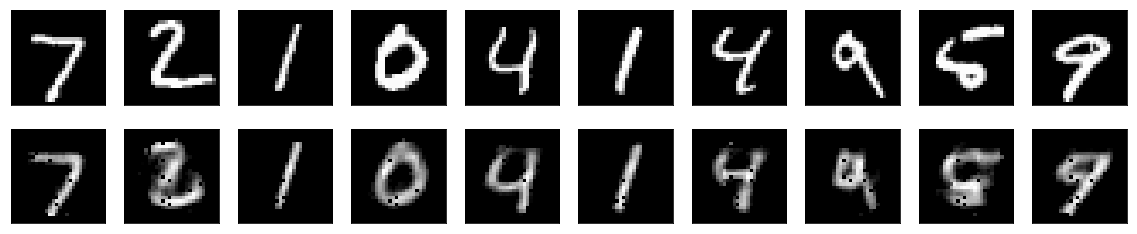

In [163]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_3d[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [72]:
autoencoder.save('toy_model_lstm_with_attention.h5')

In [107]:
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

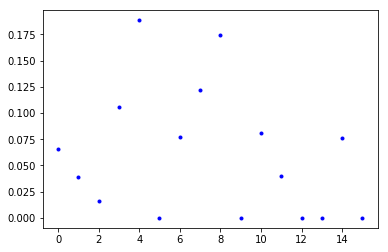

In [38]:
plt.plot(intermediate_output[0],'b.')

In [ ]:
width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

In [246]:
input_img = Input(shape=(784, 1))  # adapt this if using `channels_first` image data format

#x = Dense(128, activation='relu')(input_img)

x = Conv1D(128, 3, activation='relu', padding='same')(input_img)
x = tf.transpose(x, (0, 2, 1)) 
x = Attention()([x,x])
x = tf.transpose(x, (0, 2, 1)) 
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(128, 3, activation='relu', padding='same')(x)
x = tf.transpose(x, (0, 2, 1)) 
x = Attention()([x,x])
x = tf.transpose(x, (0, 2, 1)) 
x = MaxPooling1D(2, padding='same')(x)
# x = Conv1D(128, 3, activation='relu', padding='same')(x)
# encoded = MaxPooling1D(2, padding='same')(x)
x = tf.transpose(x, (0, 2, 1)) 
encoded = Bidirectional(LSTM(64, return_sequences=False,
                             activity_regularizer=l1(1e-4)))(x)
# # at this point the representation is (4, 4, 8) i.e. 128-dimensional
embedding = Dense(98, activation='relu',activity_regularizer=l1(1e-4))(encoded)
repeat = RepeatVector(128)(embedding)
x = tf.transpose(repeat, (0, 2, 1)) 
x = Conv1D(128, 3, activation='relu', padding='same')(x)
x = tf.transpose(x, (0, 2, 1)) 
x = Attention()([x,x])
x = tf.transpose(x, (0, 2, 1)) 
x = UpSampling1D(4)(x)
x = Conv1D(128, 3, activation='relu', padding='same')(x)
x = tf.transpose(x, (0, 2, 1)) 
x = Attention()([x,x])
x = tf.transpose(x, (0, 2, 1)) 
x = UpSampling1D(2)(x)
decoded = Conv1D(1, 3, activation='linear', padding='same')(x)
#x = UpSampling1D(2)(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(Adam(3e-5), loss='mse')

In [247]:
autoencoder.summary()

Model: "model_32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_51 (InputLayer)           [(None, 784, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_202 (Conv1D)             (None, 784, 128)     512         input_51[0][0]                   
__________________________________________________________________________________________________
tf_op_layer_transpose_53 (Tenso [(None, 128, 784)]   0           conv1d_202[0][0]                 
__________________________________________________________________________________________________
attention_6 (Attention)         (None, 128, 784)     0           tf_op_layer_transpose_53[0][0]   
                                                                 tf_op_layer_transpose_53[0

In [249]:
autoencoder.fit(x_train, x_train,
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 490s 8ms/sample - loss: 0.9095 - val_loss: 0.9003
Epoch 2/500
60000/60000 [==============================] - 483s 8ms/sample - loss: 0.8835 - val_loss: 0.8643
Epoch 3/500
60000/60000 [==============================] - 485s 8ms/sample - loss: 0.8368 - val_loss: 0.8154
Epoch 4/500
60000/60000 [==============================] - 485s 8ms/sample - loss: 0.7923 - val_loss: 0.7796
Epoch 5/500
60000/60000 [==============================] - 483s 8ms/sample - loss: 0.7592 - val_loss: 0.7500
Epoch 6/500
60000/60000 [==============================] - 482s 8ms/sample - loss: 0.7312 - val_loss: 0.7253
Epoch 7/500
60000/60000 [==============================] - 487s 8ms/sample - loss: 0.7080 - val_loss: 0.7069
Epoch 8/500
60000/60000 [==============================] - 483s 8ms/sample - loss: 0.6894 - val_loss: 0.6897
Epoch 9/500
60000/60000 [==============================] - 484s 8ms/sample - l

60000/60000 [==============================] - 484s 8ms/sample - loss: 0.4098 - val_loss: 0.4247
Epoch 76/500
60000/60000 [==============================] - 483s 8ms/sample - loss: 0.4077 - val_loss: 0.4234
Epoch 77/500
60000/60000 [==============================] - 482s 8ms/sample - loss: 0.4056 - val_loss: 0.4193
Epoch 78/500
60000/60000 [==============================] - 486s 8ms/sample - loss: 0.4036 - val_loss: 0.4195
Epoch 79/500
60000/60000 [==============================] - 483s 8ms/sample - loss: 0.4030 - val_loss: 0.4220
Epoch 80/500
60000/60000 [==============================] - 483s 8ms/sample - loss: 0.4024 - val_loss: 0.4204
Epoch 81/500
60000/60000 [==============================] - 483s 8ms/sample - loss: 0.4004 - val_loss: 0.4195
Epoch 82/500
60000/60000 [==============================] - 488s 8ms/sample - loss: 0.4008 - val_loss: 0.4192
Epoch 83/500
60000/60000 [==============================] - 483s 8ms/sample - loss: 0.4057 - val_loss: 0.4199
Epoch 84/500
60000/6000

60000/60000 [==============================] - 482s 8ms/sample - loss: 0.3545 - val_loss: 0.3714
Epoch 150/500
60000/60000 [==============================] - 483s 8ms/sample - loss: 0.3538 - val_loss: 0.3737
Epoch 151/500
60000/60000 [==============================] - 486s 8ms/sample - loss: 0.3538 - val_loss: 0.3707
Epoch 152/500
60000/60000 [==============================] - 483s 8ms/sample - loss: 0.3522 - val_loss: 0.3715
Epoch 153/500
60000/60000 [==============================] - 483s 8ms/sample - loss: 0.3578 - val_loss: 0.3831
Epoch 154/500
60000/60000 [==============================] - 484s 8ms/sample - loss: 0.3635 - val_loss: 0.3725
Epoch 155/500
60000/60000 [==============================] - 484s 8ms/sample - loss: 0.3570 - val_loss: 0.3732
Epoch 156/500
60000/60000 [==============================] - 481s 8ms/sample - loss: 0.3556 - val_loss: 0.3716
Epoch 157/500
60000/60000 [==============================] - 483s 8ms/sample - loss: 0.3532 - val_loss: 0.3690
Epoch 158/500
6

Epoch 223/500
60000/60000 [==============================] - 336s 6ms/sample - loss: 0.3281 - val_loss: 0.3491
Epoch 224/500
60000/60000 [==============================] - 336s 6ms/sample - loss: 0.3279 - val_loss: 0.3574
Epoch 225/500
60000/60000 [==============================] - 336s 6ms/sample - loss: 0.3367 - val_loss: 0.3515
Epoch 226/500
60000/60000 [==============================] - 339s 6ms/sample - loss: 0.3339 - val_loss: 0.3527
Epoch 227/500
60000/60000 [==============================] - 341s 6ms/sample - loss: 0.3318 - val_loss: 0.3498
Epoch 228/500
60000/60000 [==============================] - 340s 6ms/sample - loss: 0.3322 - val_loss: 0.3492
Epoch 229/500
60000/60000 [==============================] - 340s 6ms/sample - loss: 0.3317 - val_loss: 0.3514
Epoch 230/500
60000/60000 [==============================] - 340s 6ms/sample - loss: 0.3302 - val_loss: 0.3527
Epoch 231/500
60000/60000 [==============================] - 339s 6ms/sample - loss: 0.3293 - val_loss: 0.3517
E

Epoch 297/500
60000/60000 [==============================] - 335s 6ms/sample - loss: 0.3167 - val_loss: 0.3361
Epoch 298/500
60000/60000 [==============================] - 335s 6ms/sample - loss: 0.3162 - val_loss: 0.3346
Epoch 299/500
60000/60000 [==============================] - 336s 6ms/sample - loss: 0.3156 - val_loss: 0.3463
Epoch 300/500
60000/60000 [==============================] - 337s 6ms/sample - loss: 0.3190 - val_loss: 0.3384
Epoch 301/500
60000/60000 [==============================] - 336s 6ms/sample - loss: 0.3153 - val_loss: 0.3355
Epoch 302/500
60000/60000 [==============================] - 336s 6ms/sample - loss: 0.3161 - val_loss: 0.3407
Epoch 303/500
60000/60000 [==============================] - 340s 6ms/sample - loss: 0.3158 - val_loss: 0.3379
Epoch 304/500
60000/60000 [==============================] - 340s 6ms/sample - loss: 0.3227 - val_loss: 0.3399
Epoch 305/500
60000/60000 [==============================] - 340s 6ms/sample - loss: 0.3233 - val_loss: 0.3392
E

Epoch 371/500
60000/60000 [==============================] - 338s 6ms/sample - loss: 0.3082 - val_loss: 0.3289
Epoch 372/500
60000/60000 [==============================] - 338s 6ms/sample - loss: 0.3117 - val_loss: 0.3332
Epoch 373/500
60000/60000 [==============================] - 339s 6ms/sample - loss: 0.3092 - val_loss: 0.3273
Epoch 374/500
60000/60000 [==============================] - 338s 6ms/sample - loss: 0.3086 - val_loss: 0.3312
Epoch 375/500
60000/60000 [==============================] - 338s 6ms/sample - loss: 0.3098 - val_loss: 0.3262
Epoch 376/500
60000/60000 [==============================] - 338s 6ms/sample - loss: 0.3066 - val_loss: 0.3294
Epoch 377/500
60000/60000 [==============================] - 336s 6ms/sample - loss: 0.3064 - val_loss: 0.3283
Epoch 378/500
60000/60000 [==============================] - 337s 6ms/sample - loss: 0.3065 - val_loss: 0.3227
Epoch 379/500
60000/60000 [==============================] - 337s 6ms/sample - loss: 0.3081 - val_loss: 0.3314
E

Epoch 445/500
60000/60000 [==============================] - 449s 7ms/sample - loss: 0.3017 - val_loss: 0.3214
Epoch 446/500
60000/60000 [==============================] - 448s 7ms/sample - loss: 0.2986 - val_loss: 0.3247
Epoch 447/500
60000/60000 [==============================] - 449s 7ms/sample - loss: 0.2997 - val_loss: 0.3206
Epoch 448/500
60000/60000 [==============================] - 447s 7ms/sample - loss: 0.2968 - val_loss: 0.3203
Epoch 449/500
60000/60000 [==============================] - 449s 7ms/sample - loss: 0.2968 - val_loss: 0.3244
Epoch 450/500
60000/60000 [==============================] - 452s 8ms/sample - loss: 0.2990 - val_loss: 0.3358
Epoch 451/500
60000/60000 [==============================] - 455s 8ms/sample - loss: 0.3017 - val_loss: 0.3264
Epoch 452/500
60000/60000 [==============================] - 454s 8ms/sample - loss: 0.2977 - val_loss: 0.3275
Epoch 453/500
60000/60000 [==============================] - 455s 8ms/sample - loss: 0.3000 - val_loss: 0.3296
E

In [250]:
decoded_image = autoencoder.predict(x_test)

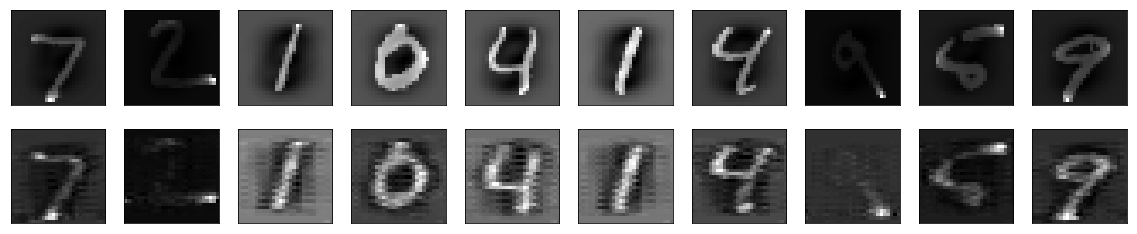

In [251]:
import matplotlib.pyplot as plt



n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_image[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [258]:
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.decomposition import NMF
from scipy import io
import numpy as np
import os
import os.path

In [256]:
import warnings
warnings.filterwarnings('ignore')
import imp
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import codes.analysis.rnn as rnn
import codes.util as util
import codes.analysis.machine_learning as ml
import codes.analysis as an
import codes.processing as p
import codes.viz as viz
import codes.util.input_output as io_transfer

In [259]:
imported = {'data': io.matlab.loadmat('./Raw_Data/Data.mat'),
            'validation_data': io.matlab.loadmat('Raw_Data/loop_1.mat')}

# extracts the important information from the raw data
raw = {'voltage': imported['data']['Voltagedata_mixed'],
       'piezoresponse': imported['data']['Loopdata_mixed'],
       'amplitude': imported['data']['OutA2_mixed'],
       'phase': imported['data']['OutPhi1_mixed'],
       'resonance': imported['data']['Outw2_mixed'],
       'quality_factor': imported['data']['OutQ2_mixed'],
       'val_piezoresponse': imported['validation_data']['piezo_1'],
       'val_resonance': imported['validation_data']['resonance_loop_1']}

In [260]:
p.filters.range_filter(raw['resonance'], [1300, 1340])
p.filters.range_filter(raw['val_resonance'], [1300, 1340])

# interpolates data that is non-real. This happens when the SHO fit fails
interpolated = {'voltage': raw['voltage'],
                'piezoresponse': p.filters.clean_interpolate(raw['piezoresponse'],
                                                             'linear').reshape(-1, raw['piezoresponse'].shape[2]),
                'amplitude': p.filters.clean_interpolate(raw['amplitude'],
                                                         'linear').reshape(-1, raw['amplitude'].shape[2]),
                'phase': p.filters.clean_interpolate(raw['phase'],
                                                     'linear').reshape(-1, raw['phase'].shape[2]),
                'resonance': p.filters.clean_interpolate(raw['resonance'],
                                                         'linear').reshape(-1, raw['resonance'].shape[2]),
                'quality_factor': p.filters.clean_interpolate(raw['quality_factor'],
                                                              'linear').reshape(-1, raw['quality_factor'].shape[2]),
                'val_piezoresponse': p.filters.clean_interpolate(raw['val_piezoresponse'],
                                                                  'linear').reshape(-1, raw['val_piezoresponse'].shape[2]),
                'val_resonance': p.filters.clean_interpolate(raw['val_resonance'],
                                                             'linear').reshape(-1, raw['val_resonance'].shape[2])}
# Uses Savitzky-Golay filter to remove outlier points
sg_filtered = {'voltage': raw['voltage'],
               'piezoresponse': p.filters.savgol(interpolated['piezoresponse'], fit_type='linear'),
               'amplitude': p.filters.savgol(interpolated['amplitude'], fit_type='linear'),
               'phase': p.filters.savgol(interpolated['phase'], fit_type='linear'),
               'resonance': p.filters.savgol(interpolated['resonance'], fit_type='linear'),
               'quality_factor': p.filters.savgol(interpolated['quality_factor'], fit_type='linear'),
               'val_piezoresponse': p.filters.savgol(interpolated['val_piezoresponse'], fit_type='linear'),
               'val_resonance': p.filters.savgol(interpolated['val_resonance'], fit_type='linear')}

# normalized the data. This is important for training Neural Networks
normalized = {'voltage': raw['voltage'],
              'piezoresponse': p.filters.normalize(sg_filtered['piezoresponse']),
              'amplitude': p.filters.normalize(sg_filtered['amplitude']),
              'phase': p.filters.normalize(sg_filtered['phase']),
              'resonance': p.filters.normalize(sg_filtered['resonance']),
              'quality_factor': p.filters.normalize(sg_filtered['quality_factor']),
              'val_piezoresponse': p.filters.normalize(sg_filtered['val_piezoresponse'],
                                                       sg_filtered['piezoresponse']),
              'val_resonance': p.filters.normalize(sg_filtered['val_resonance'],
                                                   sg_filtered['resonance'])}

In [261]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
scipy: 1.4.1
numpy: 1.17.2
matplotlib: 2.2.3
pandas: 0.25.1
sklearn: 0.22.1


In [262]:
X = np.atleast_3d(normalized['piezoresponse'])
Y = np.atleast_3d(normalized['val_piezoresponse'])

In [253]:
def Conv_Atten():
    input_img = Input(shape=(96, 1))  # adapt this if using `channels_first` image data format

#x = Dense(128, activation='relu')(input_img)

    x = Conv1D(128, 3, activation='relu', padding='same')(input_img)
    x = tf.transpose(x, (0, 2, 1)) 
    x = Attention()([x,x])
    x = tf.transpose(x, (0, 2, 1)) 
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(128, 3, activation='relu', padding='same')(x)
    x = tf.transpose(x, (0, 2, 1)) 
    x = Attention()([x,x])
    x = tf.transpose(x, (0, 2, 1)) 
    x = MaxPooling1D(2, padding='same')(x)
# x = Conv1D(128, 3, activation='relu', padding='same')(x)
# encoded = MaxPooling1D(2, padding='same')(x)
    x = tf.transpose(x, (0, 2, 1)) 
    encoded = Bidirectional(LSTM(32, return_sequences=False))(x)
# # at this point the representation is (4, 4, 8) i.e. 128-dimensional
    embedding = Dense(24, activation='relu',activity_regularizer=l1(1))(encoded)
    repeat = RepeatVector(128)(embedding)
    x = tf.transpose(repeat, (0, 2, 1)) 
    x = Conv1D(128, 3, activation='relu', padding='same')(x)
    x = tf.transpose(x, (0, 2, 1)) 
    x = Attention()([x,x])
    x = tf.transpose(x, (0, 2, 1)) 
    x = UpSampling1D(2)(x)
    x = Conv1D(128, 3, activation='relu', padding='same')(x)
    x = tf.transpose(x, (0, 2, 1)) 
    x = Attention()([x,x])
    x = tf.transpose(x, (0, 2, 1)) 
    x = UpSampling1D(2)(x)
    decoded = Conv1D(1, 3, activation='linear', padding='same')(x)
#x = UpSampling1D(2)(x)


    model = Model(input_img, decoded,name = 'Convolutional_1D_with_Attention')
    model.compile(Adam(5e-5), loss='mse')
    return model

In [254]:
have_fun = Conv_Atten()

In [272]:
checkpointer = ModelCheckpoint("10000_with_l1=1.h5", monitor='loss', verbose=0, save_best_only=True)

In [271]:
have_fun.fit(X, X, 
          epochs=10000,
          batch_size=256,
          shuffle=True,
          callbacks=[checkpointer])

Train on 3600 samples
Epoch 1/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1256
Epoch 2/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1253
Epoch 3/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1257
Epoch 4/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1253
Epoch 5/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1255
Epoch 6/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1274
Epoch 7/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1263
Epoch 8/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1263
Epoch 9/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1256
Epoch 10/10000
3600/3600 [==============================] - 4s 996us/sample - loss: 0.1256
Epoch 11/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1251
Epoch 

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1248
Epoch 93/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1255
Epoch 94/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1249
Epoch 95/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1247
Epoch 96/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1251
Epoch 97/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1247
Epoch 98/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1252
Epoch 99/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1249
Epoch 100/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1269
Epoch 101/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1252
Epoch 102/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1247
Epoch 103/10000
3600/3600 [======

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1244
Epoch 184/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1243
Epoch 185/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1242
Epoch 186/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1245
Epoch 187/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1246
Epoch 188/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1275
Epoch 189/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1250
Epoch 190/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1242
Epoch 191/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1242
Epoch 192/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1241
Epoch 193/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1246
Epoch 194/10000
3600/3600 

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1245
Epoch 275/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1243
Epoch 276/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1238
Epoch 277/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1241
Epoch 278/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1238
Epoch 279/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1245
Epoch 280/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1248
Epoch 281/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1245
Epoch 282/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1241
Epoch 283/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1262
Epoch 284/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1250
Epoch 285/10000
3600/3600 

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1234
Epoch 366/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1238
Epoch 367/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1238
Epoch 368/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1236
Epoch 369/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1243
Epoch 370/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1244
Epoch 371/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1234
Epoch 372/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1236
Epoch 373/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1234
Epoch 374/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1235
Epoch 375/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1234
Epoch 376/10000
3600/3600 

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1234
Epoch 457/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1247
Epoch 458/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1231
Epoch 459/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1233
Epoch 460/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1241
Epoch 461/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1238
Epoch 462/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1236
Epoch 463/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1230
Epoch 464/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1234
Epoch 465/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1244
Epoch 466/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1237
Epoch 467/10000
3600/3600 

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1231
Epoch 548/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1252
Epoch 549/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1228
Epoch 550/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1231
Epoch 551/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1244
Epoch 552/10000
3600/3600 [==============================] - 3s 958us/sample - loss: 0.1234
Epoch 553/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1239
Epoch 554/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1263
Epoch 555/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1244
Epoch 556/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1228
Epoch 557/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1229
Epoch 558/10000
3600/360

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1228
Epoch 639/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1229
Epoch 640/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1242
Epoch 641/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1257
Epoch 642/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1232
Epoch 643/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1229
Epoch 644/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1227
Epoch 645/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1226
Epoch 646/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1227
Epoch 647/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1226
Epoch 648/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1227
Epoch 649/10000
3600/3600 

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1228
Epoch 730/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1224
Epoch 731/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1224
Epoch 732/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1225
Epoch 733/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1227
Epoch 734/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1239
Epoch 735/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1230
Epoch 736/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1231
Epoch 737/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1244
Epoch 738/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1237
Epoch 739/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1236
Epoch 740/10000
3600/3600 

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1226
Epoch 821/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1226
Epoch 822/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1226
Epoch 823/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1230
Epoch 824/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1232
Epoch 825/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1226
Epoch 826/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1234
Epoch 827/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1223
Epoch 828/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1228
Epoch 829/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1238
Epoch 830/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1262
Epoch 831/10000
3600/3600 

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1229
Epoch 912/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1221
Epoch 913/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1226
Epoch 914/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1222
Epoch 915/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1224
Epoch 916/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1262
Epoch 917/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1259
Epoch 918/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1231
Epoch 919/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1222
Epoch 920/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1221
Epoch 921/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 922/10000
3600/3600 

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1225
Epoch 1003/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1221
Epoch 1004/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1234
Epoch 1005/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1225
Epoch 1006/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1229
Epoch 1007/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1223
Epoch 1008/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1225
Epoch 1009/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1227
Epoch 1010/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 1011/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 1012/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 1013/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1225
Epoch 1093/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 1094/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1234
Epoch 1095/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1237
Epoch 1096/10000
3600/3600 [==============================] - 3s 956us/sample - loss: 0.1222
Epoch 1097/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1224
Epoch 1098/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1226
Epoch 1099/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1224
Epoch 1100/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 1101/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1225
Epoch 1102/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1221
Epoch 1103/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1235
Epoch 1183/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1223
Epoch 1184/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1224
Epoch 1185/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1230
Epoch 1186/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1226
Epoch 1187/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 1188/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 1189/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 1190/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1222
Epoch 1191/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 1192/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 1193/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 1273/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1227
Epoch 1274/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1237
Epoch 1275/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1249
Epoch 1276/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1221
Epoch 1277/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 1278/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 1279/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 1280/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 1281/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 1282/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1223
Epoch 1283/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1235
Epoch 1363/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 1364/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 1365/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1238
Epoch 1366/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1222
Epoch 1367/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 1368/10000
3600/3600 [==============================] - 3s 923us/sample - loss: 0.1221
Epoch 1369/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 1370/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1221
Epoch 1371/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1225
Epoch 1372/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1237
Epoch 1373/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1251
Epoch 1453/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1223
Epoch 1454/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 1455/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 1456/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 1457/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 1458/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1238
Epoch 1459/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1226
Epoch 1460/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 1461/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 1462/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1221
Epoch 1463/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1230
Epoch 1543/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 1544/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 1545/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 1546/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 1547/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 1548/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 1549/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 1550/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1238
Epoch 1551/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 1552/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 1553/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1225
Epoch 1633/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 1634/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1226
Epoch 1635/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 1636/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1228
Epoch 1637/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 1638/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 1639/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 1640/10000
3600/3600 [==============================] - 3s 944us/sample - loss: 0.1253
Epoch 1641/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 1642/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 1643/100

3600/3600 [==============================] - 4s 1000us/sample - loss: 0.1216
Epoch 1723/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 1724/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1225
Epoch 1725/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1232
Epoch 1726/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 1727/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1229
Epoch 1728/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 1729/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 1730/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 1731/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 1732/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 1733/10

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 1813/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 1814/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 1815/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 1816/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1232
Epoch 1817/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 1818/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 1819/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 1820/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 1821/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1229
Epoch 1822/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1226
Epoch 1823/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 1903/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1225
Epoch 1904/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 1905/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 1906/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1232
Epoch 1907/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1225
Epoch 1908/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 1909/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 1910/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 1911/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 1912/10000
3600/3600 [==============================] - 3s 957us/sample - loss: 0.1215
Epoch 1913/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1222
Epoch 1993/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1252
Epoch 1994/10000
3600/3600 [==============================] - 4s 990us/sample - loss: 0.1214
Epoch 1995/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 1996/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 1997/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 1998/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 1999/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 2000/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 2001/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 2002/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 2003/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 2083/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 2084/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 2085/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 2086/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 2087/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 2088/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 2089/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1234
Epoch 2090/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 2091/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 2092/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1225
Epoch 2093/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 2173/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 2174/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 2175/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 2176/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 2177/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 2178/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1232
Epoch 2179/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 2180/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 2181/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 2182/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 2183/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1225
Epoch 2263/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1239
Epoch 2264/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 2265/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 2266/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 2267/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 2268/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1221
Epoch 2269/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 2270/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 2271/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 2272/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 2273/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 2353/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 2354/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 2355/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 2356/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 2357/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1224
Epoch 2358/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 2359/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 2360/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 2361/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 2362/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 2363/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 2443/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 2444/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 2445/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 2446/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 2447/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1227
Epoch 2448/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1226
Epoch 2449/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 2450/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 2451/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 2452/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 2453/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1221
Epoch 2533/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 2534/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 2535/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 2536/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 2537/10000
3600/3600 [==============================] - 4s 977us/sample - loss: 0.1219
Epoch 2538/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1225
Epoch 2539/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 2540/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 2541/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1227
Epoch 2542/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 2543/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 2623/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 2624/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1234
Epoch 2625/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 2626/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 2627/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 2628/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1230
Epoch 2629/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 2630/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 2631/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 2632/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 2633/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 2713/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 2714/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 2715/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 2716/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 2717/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 2718/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1236
Epoch 2719/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 2720/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 2721/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 2722/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 2723/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 2803/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 2804/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 2805/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 2806/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 2807/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 2808/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 2809/10000
3600/3600 [==============================] - 4s 976us/sample - loss: 0.1214
Epoch 2810/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 2811/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 2812/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 2813/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 2893/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 2894/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 2895/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 2896/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1246
Epoch 2897/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 2898/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 2899/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 2900/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 2901/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1223
Epoch 2902/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 2903/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1234
Epoch 2983/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1231
Epoch 2984/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 2985/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 2986/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 2987/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 2988/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 2989/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 2990/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 2991/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1228
Epoch 2992/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1224
Epoch 2993/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 3073/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 3074/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 3075/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 3076/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 3077/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 3078/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 3079/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1240
Epoch 3080/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1222
Epoch 3081/10000
3600/3600 [==============================] - 3s 930us/sample - loss: 0.1220
Epoch 3082/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 3083/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1223
Epoch 3163/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 3164/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 3165/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 3166/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1223
Epoch 3167/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 3168/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 3169/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 3170/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 3171/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 3172/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1224
Epoch 3173/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 3253/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1223
Epoch 3254/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 3255/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 3256/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 3257/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1225
Epoch 3258/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 3259/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 3260/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 3261/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 3262/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1229
Epoch 3263/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 3343/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 3344/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 3345/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1224
Epoch 3346/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 3347/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 3348/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 3349/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 3350/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 3351/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 3352/10000
3600/3600 [==============================] - 4s 1000us/sample - loss: 0.1209
Epoch 3353/10

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 3433/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 3434/10000
3600/3600 [==============================] - 3s 935us/sample - loss: 0.1211
Epoch 3435/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 3436/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 3437/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 3438/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1235
Epoch 3439/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 3440/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 3441/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 3442/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 3443/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 3523/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 3524/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 3525/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 3526/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 3527/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 3528/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 3529/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1221
Epoch 3530/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 3531/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 3532/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 3533/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 3613/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 3614/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 3615/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 3616/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 3617/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 3618/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 3619/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 3620/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 3621/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1245
Epoch 3622/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 3623/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 3703/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 3704/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 3705/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 3706/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 3707/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 3708/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 3709/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 3710/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 3711/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1243
Epoch 3712/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 3713/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 3793/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 3794/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 3795/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 3796/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 3797/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1224
Epoch 3798/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 3799/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 3800/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 3801/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 3802/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1227
Epoch 3803/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 3883/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 3884/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1221
Epoch 3885/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 3886/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 3887/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 3888/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 3889/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 3890/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 3891/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 3892/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 3893/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 3973/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1221
Epoch 3974/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1233
Epoch 3975/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 3976/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 3977/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 3978/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 3979/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 3980/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 3981/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 3982/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 3983/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 4063/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4064/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 4065/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 4066/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 4067/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1227
Epoch 4068/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 4069/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 4070/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 4071/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4072/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4073/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 4153/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 4154/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1221
Epoch 4155/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 4156/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 4157/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 4158/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 4159/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 4160/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 4161/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 4162/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 4163/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 4243/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 4244/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 4245/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4246/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 4247/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 4248/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 4249/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 4250/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4251/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 4252/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 4253/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 4333/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4334/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 4335/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 4336/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 4337/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4338/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1230
Epoch 4339/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 4340/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 4341/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4342/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 4343/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 4423/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 4424/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 4425/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 4426/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4427/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 4428/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 4429/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 4430/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 4431/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 4432/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1243
Epoch 4433/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4513/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 4514/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 4515/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4516/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 4517/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 4518/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 4519/10000
3600/3600 [==============================] - 3s 934us/sample - loss: 0.1207
Epoch 4520/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 4521/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 4522/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4523/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 4603/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4604/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 4605/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 4606/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 4607/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 4608/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 4609/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1223
Epoch 4610/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 4611/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 4612/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 4613/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 4693/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 4694/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4695/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4696/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 4697/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 4698/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 4699/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 4700/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 4701/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 4702/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 4703/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 4783/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 4784/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 4785/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 4786/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 4787/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 4788/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 4789/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 4790/10000
3600/3600 [==============================] - 3s 957us/sample - loss: 0.1210
Epoch 4791/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 4792/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 4793/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 4873/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 4874/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 4875/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 4876/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1223
Epoch 4877/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 4878/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4879/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 4880/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 4881/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 4882/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 4883/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 4963/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 4964/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 4965/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 4966/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 4967/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 4968/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 4969/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1217
Epoch 4970/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 4971/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 4972/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 4973/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1222
Epoch 5053/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 5054/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 5055/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 5056/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 5057/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 5058/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 5059/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 5060/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5061/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5062/10000
3600/3600 [==============================] - 4s 1000us/sample - loss: 0.1215
Epoch 5063/10

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 5143/10000
3600/3600 [==============================] - 3s 910us/sample - loss: 0.1212
Epoch 5144/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 5145/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 5146/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 5147/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5148/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 5149/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1230
Epoch 5150/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 5151/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 5152/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 5153/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 5233/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5234/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1234
Epoch 5235/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 5236/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 5237/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 5238/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 5239/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 5240/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 5241/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 5242/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 5243/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 5323/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 5324/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 5325/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 5326/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 5327/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 5328/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5329/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 5330/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5331/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 5332/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 5333/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 5413/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5414/10000
3600/3600 [==============================] - 3s 923us/sample - loss: 0.1208
Epoch 5415/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 5416/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 5417/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1221
Epoch 5418/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 5419/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5420/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 5421/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5422/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5423/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 5503/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1223
Epoch 5504/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 5505/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5506/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 5507/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5508/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 5509/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 5510/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 5511/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 5512/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 5513/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 5593/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 5594/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 5595/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5596/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5597/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 5598/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 5599/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 5600/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 5601/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5602/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1245
Epoch 5603/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5683/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 5684/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 5685/10000
3600/3600 [==============================] - 4s 975us/sample - loss: 0.1215
Epoch 5686/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5687/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 5688/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 5689/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 5690/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5691/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 5692/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5693/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 5773/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 5774/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 5775/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 5776/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5777/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 5778/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1223
Epoch 5779/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 5780/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 5781/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 5782/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 5783/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 5863/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 5864/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 5865/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 5866/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 5867/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 5868/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 5869/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 5870/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 5871/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 5872/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 5873/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 5953/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1227
Epoch 5954/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 5955/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 5956/10000
3600/3600 [==============================] - 4s 978us/sample - loss: 0.1208
Epoch 5957/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 5958/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 5959/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 5960/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1218
Epoch 5961/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 5962/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 5963/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 6043/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6044/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6045/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 6046/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 6047/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 6048/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1222
Epoch 6049/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 6050/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 6051/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 6052/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 6053/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 6133/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6134/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 6135/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 6136/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 6137/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 6138/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 6139/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 6140/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 6141/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 6142/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 6143/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 6223/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6224/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 6225/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6226/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6227/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1229
Epoch 6228/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 6229/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 6230/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6231/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 6232/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 6233/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6313/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 6314/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 6315/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 6316/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 6317/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 6318/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 6319/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 6320/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 6321/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 6322/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 6323/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 6403/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6404/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6405/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 6406/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 6407/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6408/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6409/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1220
Epoch 6410/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1224
Epoch 6411/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 6412/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 6413/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 6493/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 6494/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 6495/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 6496/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 6497/10000
3600/3600 [==============================] - 3s 966us/sample - loss: 0.1203
Epoch 6498/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 6499/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 6500/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 6501/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 6502/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6503/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 6583/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 6584/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 6585/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 6586/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 6587/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 6588/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 6589/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 6590/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 6591/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 6592/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 6593/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 6673/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 6674/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 6675/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 6676/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 6677/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 6678/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 6679/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 6680/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 6681/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 6682/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 6683/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 6763/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 6764/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 6765/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 6766/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 6767/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 6768/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6769/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 6770/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 6771/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 6772/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6773/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 6853/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 6854/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 6855/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6856/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 6857/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 6858/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 6859/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 6860/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 6861/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1230
Epoch 6862/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6863/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 6943/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 6944/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 6945/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1212
Epoch 6946/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 6947/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 6948/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 6949/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 6950/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 6951/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 6952/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 6953/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 7033/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7034/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7035/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 7036/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 7037/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 7038/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 7039/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 7040/10000
3600/3600 [==============================] - 3s 916us/sample - loss: 0.1204
Epoch 7041/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 7042/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 7043/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 7123/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7124/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7125/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 7126/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 7127/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 7128/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 7129/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7130/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7131/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 7132/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1222
Epoch 7133/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7213/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 7214/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 7215/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 7216/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7217/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 7218/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 7219/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7220/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 7221/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 7222/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 7223/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 7303/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 7304/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 7305/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 7306/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 7307/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 7308/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 7309/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 7310/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7311/10000
3600/3600 [==============================] - 3s 944us/sample - loss: 0.1200
Epoch 7312/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 7313/100

3600/3600 [==============================] - 3s 950us/sample - loss: 0.1201
Epoch 7393/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 7394/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 7395/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 7396/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7397/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 7398/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7399/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7400/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 7401/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 7402/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1223
Epoch 7403/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7483/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 7484/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7485/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 7486/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 7487/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 7488/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 7489/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7490/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 7491/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 7492/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 7493/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 7573/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 7574/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 7575/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 7576/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7577/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7578/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7579/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 7580/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1210
Epoch 7581/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 7582/10000
3600/3600 [==============================] - 4s 998us/sample - loss: 0.1201
Epoch 7583/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7663/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 7664/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7665/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1209
Epoch 7666/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7667/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 7668/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 7669/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 7670/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 7671/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7672/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7673/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7753/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 7754/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 7755/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 7756/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7757/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 7758/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7759/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7760/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 7761/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 7762/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 7763/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7843/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 7844/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7845/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 7846/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 7847/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 7848/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 7849/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7850/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7851/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 7852/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7853/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 7933/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 7934/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 7935/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 7936/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 7937/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 7938/10000
3600/3600 [==============================] - 3s 956us/sample - loss: 0.1197
Epoch 7939/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 7940/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 7941/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 7942/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 7943/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 8023/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 8024/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 8025/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 8026/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8027/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 8028/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8029/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 8030/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 8031/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 8032/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1214
Epoch 8033/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 8113/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 8114/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 8115/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8116/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 8117/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 8118/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 8119/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 8120/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 8121/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 8122/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 8123/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 8203/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8204/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 8205/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8206/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 8207/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 8208/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 8209/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 8210/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 8211/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8212/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 8213/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 8293/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1219
Epoch 8294/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 8295/10000
3600/3600 [==============================] - 3s 932us/sample - loss: 0.1209
Epoch 8296/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 8297/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 8298/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8299/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8300/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8301/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 8302/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 8303/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 8383/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 8384/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 8385/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 8386/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 8387/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 8388/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 8389/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 8390/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 8391/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8392/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 8393/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 8473/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 8474/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 8475/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 8476/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 8477/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 8478/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 8479/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 8480/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 8481/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 8482/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 8483/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 8563/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8564/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 8565/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8566/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1208
Epoch 8567/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8568/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8569/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 8570/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 8571/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 8572/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 8573/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 8653/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 8654/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 8655/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 8656/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 8657/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 8658/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 8659/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 8660/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 8661/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 8662/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 8663/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 8743/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 8744/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 8745/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 8746/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 8747/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1213
Epoch 8748/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8749/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 8750/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 8751/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 8752/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 8753/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 8833/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 8834/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 8835/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 8836/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 8837/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 8838/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 8839/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 8840/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 8841/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8842/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8843/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 8923/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1215
Epoch 8924/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 8925/10000
3600/3600 [==============================] - 4s 982us/sample - loss: 0.1199
Epoch 8926/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 8927/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 8928/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 8929/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 8930/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 8931/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 8932/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 8933/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 9013/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 9014/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 9015/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 9016/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 9017/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 9018/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 9019/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9020/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 9021/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 9022/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 9023/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 9103/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 9104/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 9105/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 9106/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 9107/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 9108/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 9109/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 9110/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 9111/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 9112/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 9113/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 9193/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9194/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 9195/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 9196/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 9197/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 9198/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9199/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 9200/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 9201/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 9202/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 9203/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9283/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1192
Epoch 9284/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 9285/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 9286/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1192
Epoch 9287/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1216
Epoch 9288/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1202
Epoch 9289/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9290/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9291/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 9292/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 9293/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 9373/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 9374/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 9375/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9376/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9377/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 9378/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 9379/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 9380/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9381/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1198
Epoch 9382/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 9383/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9463/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1192
Epoch 9464/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1192
Epoch 9465/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1232
Epoch 9466/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1207
Epoch 9467/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 9468/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1191
Epoch 9469/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1192
Epoch 9470/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1192
Epoch 9471/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 9472/10000
3600/3600 [==============================] - 4s 999us/sample - loss: 0.1191
Epoch 9473/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1199
Epoch 9553/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1200
Epoch 9554/10000
3600/3600 [==============================] - 3s 946us/sample - loss: 0.1194
Epoch 9555/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 9556/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 9557/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1192
Epoch 9558/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1191
Epoch 9559/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 9560/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 9561/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 9562/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 9563/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9643/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1192
Epoch 9644/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1191
Epoch 9645/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1201
Epoch 9646/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 9647/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9648/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1192
Epoch 9649/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 9650/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1192
Epoch 9651/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1205
Epoch 9652/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 9653/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9733/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1192
Epoch 9734/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 9735/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1192
Epoch 9736/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9737/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1191
Epoch 9738/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9739/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1192
Epoch 9740/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1211
Epoch 9741/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9742/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1192
Epoch 9743/10000

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1195
Epoch 9823/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1190
Epoch 9824/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1203
Epoch 9825/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1206
Epoch 9826/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 9827/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1193
Epoch 9828/10000
3600/3600 [==============================] - 3s 933us/sample - loss: 0.1196
Epoch 9829/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1190
Epoch 9830/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1191
Epoch 9831/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1190
Epoch 9832/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1192
Epoch 9833/100

3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 9913/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1197
Epoch 9914/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1191
Epoch 9915/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1190
Epoch 9916/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1190
Epoch 9917/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1196
Epoch 9918/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1189
Epoch 9919/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1190
Epoch 9920/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1204
Epoch 9921/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 9922/10000
3600/3600 [==============================] - 4s 1ms/sample - loss: 0.1194
Epoch 9923/10000

In [273]:
have_fun.save('10000_with_l1=1.h5')